In [1]:
from imports import *
from exactDiagMethods import build_exact_diag_hamiltonian, perform_exact_diag
from globalMethods import  build_initial_states, output_results, output_vqte_results
from vqteMethods import hamiltonian_generation, perform_vqte

In [2]:

def main():
    # Initialize the simulation parameters
    N = 3
    gamma=0.05
    eps= 1
    mu_L=0.2
    mu_R=0.2
    T_L = 4
    T_R= 5
    beta_L=1/T_L
    beta_R=1/T_R
    F_L = 1/(np.exp(beta_L*(eps-mu_L))+1)
    F_R = 1/(np.exp(beta_R*(eps-mu_R))+1)
    J = 1
  
    time = 80.0
    dt = 0.1
    nt = int(time/dt)
    exact_diag_ham= build_exact_diag_hamiltonian(N,J, eps)
    print("Exact Ham", exact_diag_ham)

   
    ham_real, ham_imag = hamiltonian_generation(N, eps, gamma, beta_L, beta_R, J)
    print("Ham imag", ham_imag)
    print("Ham real", ham_real)

    vqte_init_state, exact_diag_init_state, ansatz, init_param_values = build_initial_states(ham_real,N)
    #exact_diag_results, time_points = perform_exact_diag(gamma, F_L, F_R, dt, nt, exact_diag_init_state,exact_diag_ham,N,eps)

    print("VQTE initial state", vqte_init_state)
    print("Exact initial state:",exact_diag_init_state)
    vqte_results = perform_vqte(ham_real, ham_imag, vqte_init_state, dt, nt, ansatz, init_param_values,N)
    output_vqte_results(vqte_results, time, nt)
    # # Perform exact diagonalization

   
    exact_diag_results = []
    time_points = []
    # # Perform VQTE simulation

    # # Output results
    output_results(vqte_results, exact_diag_results, time, nt, time_points)

Exact Ham [[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]
Ham imag SparsePauliOp(['ZII', 'ZII', 'IIZ', 'IIZ'],
              coeffs=[-0.00625+0.j, -0.00625+0.j, -0.005  +0.j, -0.005  +0.j])
Ham real SparsePauliOp(['ZII', 'IZI', 'IIZ', 'XYI', 'YXI', 'IXY', 'IYX'],
              coeffs=[0.5+0.j, 0.5+0.j, 0.5+0.j, 1. +0.j, 1. +0.j, 1. +0.j, 1. +0.j])
3
VQTE initial state Statevector([ 1.00000000e+00+7.34788079e-16j,
             -1.22464680e-16-5.99903913e-32j,
             -1.22464680e-16-5.99903913e-32j,
             -1.22464680e-16+2.73691106e-48j,
             -2.4492

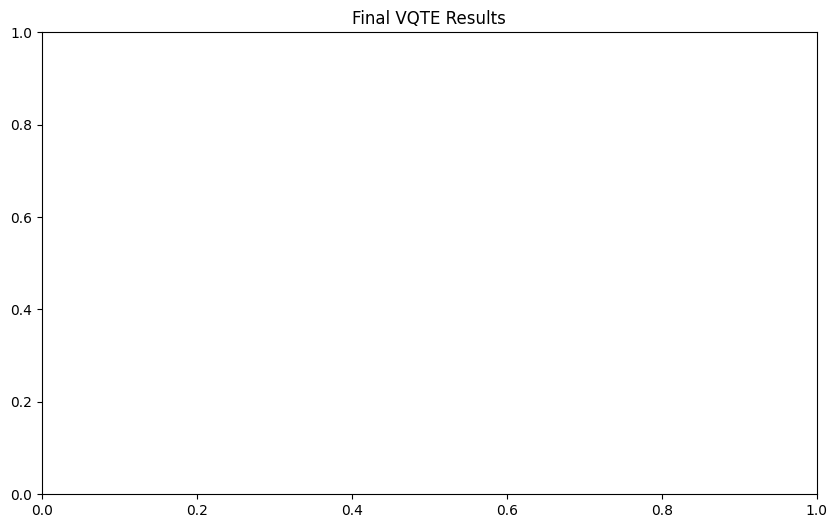

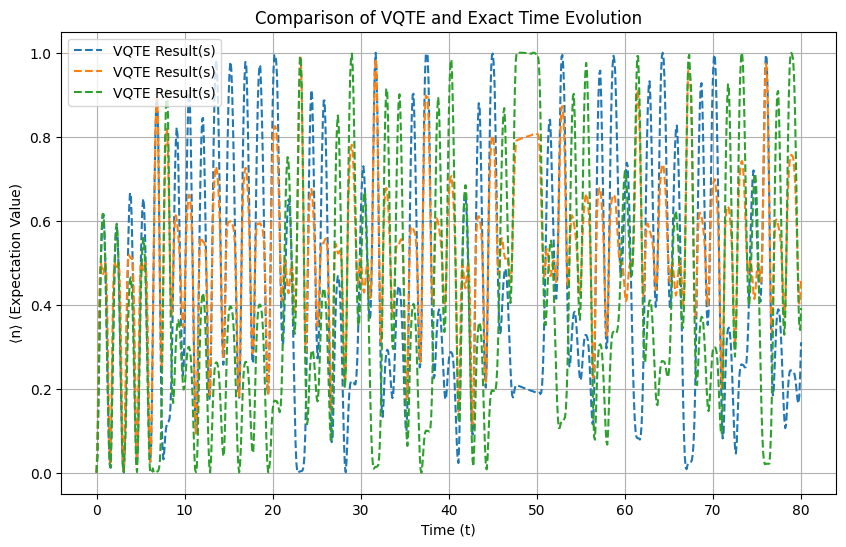

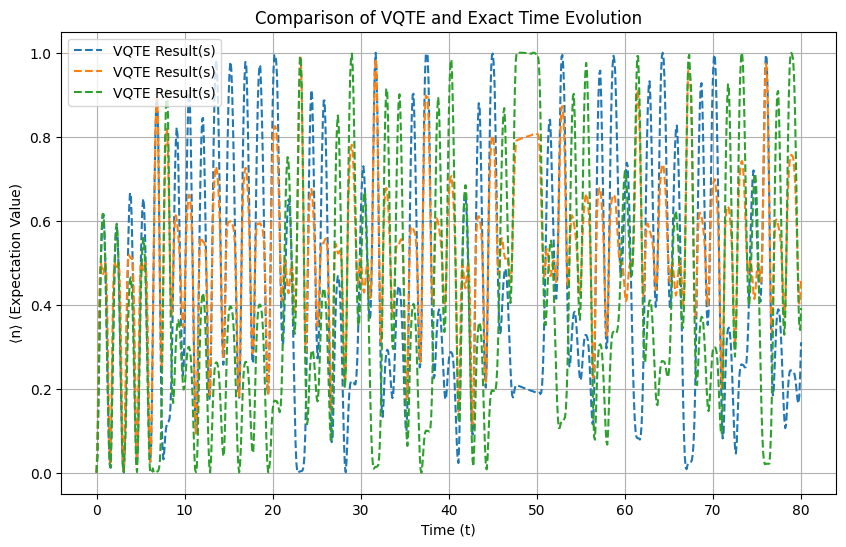

In [3]:
main()